In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import median_absolute_error

In [2]:
dataset=pd.read_csv("mobile phone rating by dxo.csv")
dataset.head()

,model,price,launch,camera,selfie,audio,display,battery
0,Huawei P50 Pro,$907,Jul 2021,144.0,106.0,NaN,93.0,NaN
1,Xiaomi Mi 11 Ultra,$1200,Mar 2021,143.0,94.0,71.0,87.0,69.0
2,Huawei Mate 40 Pro+,$1363,Oct 2020,139.0,NaN,NaN,NaN,NaN
3,Apple iPhone 13 Pro Max,$1099,Sep 2021,137.0,99.0,75.0,99.0,89.0
4,Apple iPhone 13 Pro,$999,Sep 2021,137.0,99.0,75.0,98.0,76.0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   model    223 non-null    object 
 1   price    223 non-null    object 
 2   launch   223 non-null    object 
 3   camera   184 non-null    float64
 4   selfie   72 non-null     float64
 5   audio    93 non-null     float64
 6   display  64 non-null     float64
 7   battery  54 non-null     float64
dtypes: float64(5), object(3)
memory usage: 14.1+ KB


In [4]:
dataset.isnull().sum()

model        0
price        0
launch       0
camera      39
selfie     151
audio      130
display    159
battery    169
dtype: int64

<AxesSubplot:>

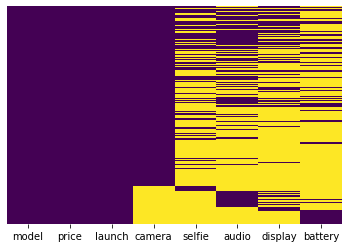

In [5]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [6]:
dataset.mean()

C:\Users\UAS\AppData\Local\Temp/ipykernel_11764/1799472221.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.mean()


camera     106.445652
selfie      87.069444
audio       65.451613
display     82.375000
battery     74.351852
dtype: float64

In [7]:
dt1=dataset.replace(np.NAN,dataset.mean()).head(15)
dt1

C:\Users\UAS\AppData\Local\Temp/ipykernel_11764/1426138309.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dt1=dataset.replace(np.NAN,dataset.mean()).head(15)


,model,price,launch,camera,selfie,audio,display,battery
0,Huawei P50 Pro,$907,Jul 2021,144.0,106.000000,65.451613,93.000,74.351852
1,Xiaomi Mi 11 Ultra,$1200,Mar 2021,143.0,94.000000,71.000000,87.000,69.000000
2,Huawei Mate 40 Pro+,$1363,Oct 2020,139.0,87.069444,65.451613,82.375,74.351852
3,Apple iPhone 13 Pro Max,$1099,Sep 2021,137.0,99.000000,75.000000,99.000,89.000000
4,Apple iPhone 13 Pro,$999,Sep 2021,137.0,99.000000,75.000000,98.000,76.000000
5,Huawei Mate 40 Pro,$1199,Oct 2020,136.0,104.000000,65.451613,82.375,74.351852
6,Google Pixel 6 Pro,$899,Oct 2021,135.0,102.000000,71.000000,90.000,74.351852
7,Vivo X70 Pro+,$833,Sep 2021,135.0,87.069444,66.000000,91.000,74.351852
8,Asus Smartphone for Snapdragon Insiders,$1499,Jul 2021,133.0,87.069444,77.000000,82.375,74.351852
9,Xiaomi Mi 10 Ultra,$803,Aug 2020,133.0,88.000000,65.451613,73.000,74.351852


In [8]:
dt1.isnull().sum()

model      0
price      0
launch     0
camera     0
selfie     0
audio      0
display    0
battery    0
dtype: int64

<AxesSubplot:>

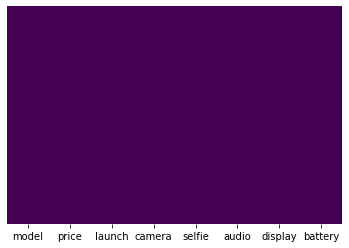

In [9]:
sns.heatmap(dt1.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [10]:
dt1['price'] = dt1['price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
dt1['price'] = dt1['price'].apply(lambda x: float(x))
dt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   model    15 non-null     object 
 1   price    15 non-null     float64
 2   launch   15 non-null     object 
 3   camera   15 non-null     float64
 4   selfie   15 non-null     float64
 5   audio    15 non-null     float64
 6   display  15 non-null     float64
 7   battery  15 non-null     float64
dtypes: float64(6), object(2)
memory usage: 1.1+ KB


In [11]:
object_data=[]
for i in dt1.columns:
    if dt1[i].dtypes=='object':
        object_data.append(i)
object_data

['model', 'launch']

In [12]:
if object_data:
            onehotdata = pd.get_dummies(dt1,columns=object_data,drop_first='True')
dt2=onehotdata.copy()
dt2.head()

,price,camera,selfie,audio,display,battery,model_Apple iPhone 13 Pro Max,model_Asus Smartphone for Snapdragon Insiders,model_Google Pixel 6,model_Google Pixel 6 Pro,...,model_Vivo X70 Pro+,model_Xiaomi Mi 10 Ultra,model_Xiaomi Mi 11 Ultra,launch_Jul 2021,launch_Jun 2020,launch_Mar 2020,launch_Mar 2021,launch_Oct 2020,launch_Oct 2021,launch_Sep 2021
0,907.0,144.0,106.000000,65.451613,93.000,74.351852,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1200.0,143.0,94.000000,71.000000,87.000,69.000000,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,1363.0,139.0,87.069444,65.451613,82.375,74.351852,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1099.0,137.0,99.000000,75.000000,99.000,89.000000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,999.0,137.0,99.000000,75.000000,98.000,76.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


c:\users\uas\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


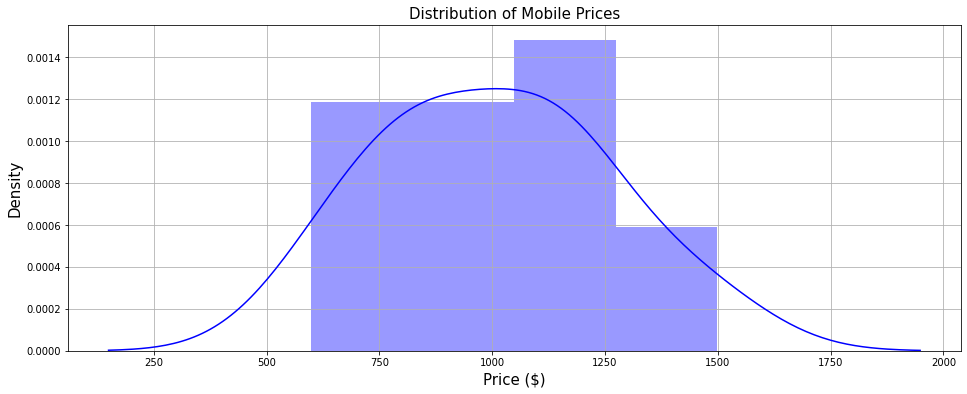

In [13]:
plt.figure(figsize = (16,6)) # set width & height of the figure

plt.title('Distribution of Mobile Prices',size=15,color = 'black')
plt.xlabel('Price $',fontsize=15)
plt.ylabel('Density',fontsize=15)
sns.distplot(dt2['price'],color = 'blue')
plt.xlabel("Price ($)")
plt.grid(True)
plt.show()

In [14]:
X=dt2.drop("price",axis=1)
y=dt2.loc[:,"price"]
y=np.array(y).reshape(-1,1)
y[:10]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)

In [15]:
steps = [
        ('scalar', StandardScaler()),
        ('model', SVR())
        ]
PipelineModel = Pipeline(steps)
PipelineModel.fit(X_train, y_train)


c:\users\uas\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('scalar', StandardScaler()), ('model', SVR())])

In [16]:
PipelineModel.score(X_train,y_train)

0.006253541142903218

In [17]:
PipelineModel.score(X_test,y_test)

-0.4708513457556953

In [27]:
steps = [
        ('scalar', StandardScaler()),
        ('model', LinearRegression())
        ]
PipelineModellinear = Pipeline(steps)
PipelineModellinear.fit(X_train, y_train)


Pipeline(steps=[('scalar', StandardScaler()), ('model', LinearRegression())])

In [19]:
PipelineModellinear.score(X_train,y_train)

1.0

In [20]:
PipelineModellinear.score(X_test,y_test)

-0.6255369336644689

In [21]:
#for linear

y_pred=PipelineModellinear.predict(X_test)
y_pred

array([[1146.55958403],
       [ 866.94720595],
       [ 803.53254612],
       [ 913.16878845],
       [ 948.0837715 ]])

In [22]:
#for linear
MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average') 
print('Mean Absolute Error Value is : ', MAEValue)
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average')
print('Mean Squared Error Value is : ', MSEValue)

Mean Absolute Error Value is :  212.2091361693051
Mean Squared Error Value is :  91629.82639225511


In [23]:
#SVR
y_preds=PipelineModel.predict(X_test)
y_preds

array([953.2306553 , 952.73595805, 952.75278953, 953.15061781,
       952.99159275])

In [24]:
#SVR

MAEValue = mean_absolute_error(y_test, y_preds, multioutput='uniform_average') 
print('Mean Absolute Error Value is : ', MAEValue)
MSEValue = mean_squared_error(y_test, y_preds, multioutput='uniform_average')
print('Mean Squared Error Value is : ', MSEValue)

Mean Absolute Error Value is :  232.38904024666536
Mean Squared Error Value is :  82910.36067484898


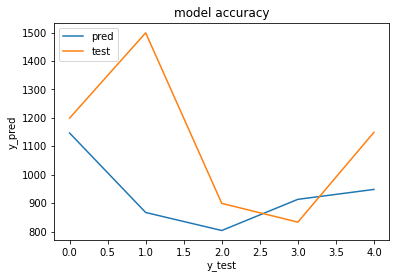

In [28]:
plt.plot(y_pred)
plt.plot(y_test)
plt.title('model accuracy')
plt.ylabel('y_pred')
plt.xlabel('y_test')
plt.legend(['pred', 'test'], loc='upper left')
plt.show()

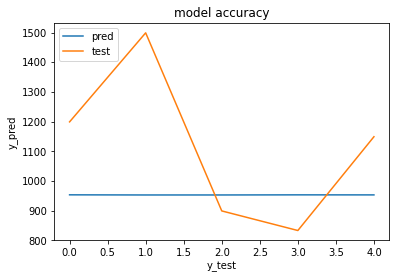

In [29]:
#SVR
plt.plot(y_preds)
plt.plot(y_test)
plt.title('model accuracy')
plt.ylabel('y_pred')
plt.xlabel('y_test')
plt.legend(['pred', 'test'], loc='upper left')
plt.show()